# Tanmay Garg
## CS20BTECH11063
### Data Science Analysis Assignment 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import astroML
from astroML.stats import sigmaG
import pandas as pd

# Q1

Shapiro-Wilk Test on Density column: W statistic =  0.9246721863746643 and p-value =  0.051220282912254333
Shapiro-Wilk Test on log of Density column: W statistic =  0.9686306715011597 and p-value =  0.5660613775253296


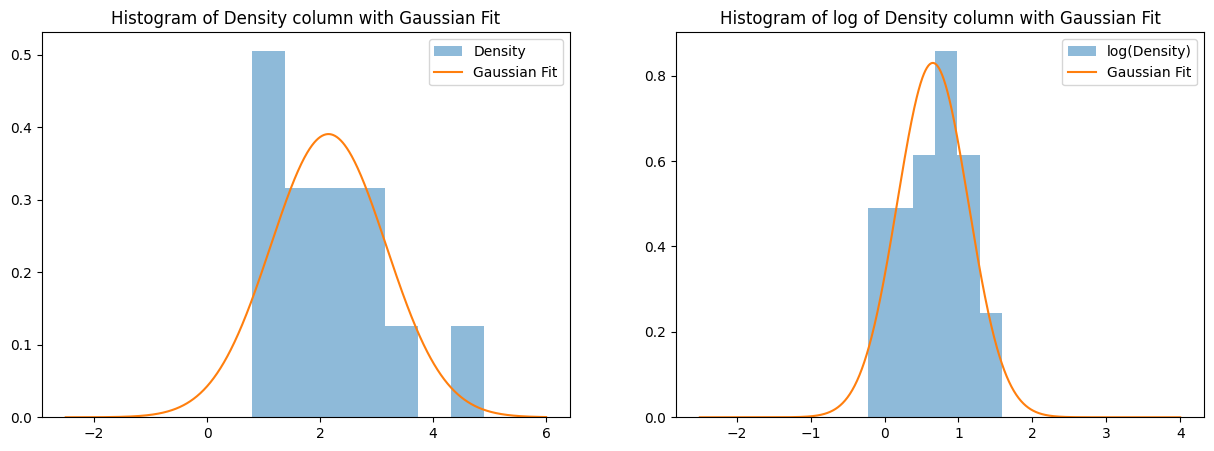

In [2]:
# Read Data from CSV
df = pd.read_csv('q1.csv')
df = df.fillna(0)

# Applying Shapiro-Wilk Test on 'Dens' column of df
Dens_shapiro_statistic, Dens_shapiro_pvalue = stats.shapiro(df['Dens'])

# print the results
print('Shapiro-Wilk Test on Density column: W statistic = ', Dens_shapiro_statistic, 'and p-value = ', Dens_shapiro_pvalue)

# Applying Shapiro-Wilk Test on log of 'Dens' column of df
log_Dens_shapiro_statistic, log_Dens_shapiro_pvalue = stats.shapiro(np.log(df['Dens']))

# print the results
print('Shapiro-Wilk Test on log of Density column: W statistic = ', log_Dens_shapiro_statistic, 'and p-value = ', log_Dens_shapiro_pvalue)

# Plotting the histogram and gaussian fits
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gaussian fit on 'Dens' column of df
loc, scale = stats.norm.fit(df['Dens'])
axs[0].hist(df['Dens'], bins=7, density=True, alpha=0.5, label='Density')
x = np.linspace(-2.5, 6, 1000)
axs[0].plot(x, stats.norm.pdf(x, loc, scale), label='Gaussian Fit')
axs[0].legend()
axs[0].set_title('Histogram of Density column with Gaussian Fit')

# Gaussian fit on log of 'Dens' column of df
log_loc, log_scale = stats.norm.fit(np.log(df['Dens']))
axs[1].hist(np.log(df['Dens']), bins=6, density=True, alpha=0.5, label='log(Density)')
x = np.linspace(-2.5, 4, 1000)
axs[1].plot(x, stats.norm.pdf(x, log_loc, log_scale), label='Gaussian Fit')
axs[1].legend()
axs[1].set_title('Histogram of log of Density column with Gaussian Fit')

plt.show()


Distribution of log of density seems more likely to be a Gaussian Distribution

# Q2

In [5]:
df = pd.read_csv('q2.csv', sep=' ')
# divide the data into two groups such that RA between 50 and 100, DE between 0 and 25, pmRA between 90 and 130,
# pmDE between -60 and -10, all lie in one group
df_hyades = df[(df['RA'] >= 50) & (df['RA'] <= 100) & (df['DE'] >= 0) & (df['DE'] <= 25) 
               & (df['pmRA'] >= 90) & (df['pmRA'] <= 130) & (df['pmDE'] >= -60) & (df['pmDE'] <= -10)]
df_non_hyades = df[(df['RA'] < 50) | (df['RA'] > 100) | (df['DE'] < 0) | (df['DE'] > 25) 
                   | (df['pmRA'] < 90) | (df['pmRA'] > 130) | (df['pmDE'] < -60) | (df['pmDE'] > -10)]

print('Number of stars in Hyades cluster: ', len(df_hyades))
print('Number of stars not in Hyades cluster: ', len(df_non_hyades))

# Calculate using two-sample t-test if color of stars in Hyades cluster is different from color of stars not in Hyades cluster
t_statistic, p_value = stats.ttest_ind(df_hyades['B-V'], df_non_hyades['B-V'])
print('t-statistic = ', t_statistic, 'and p-value = ', p_value)





# find variance of 'B-V' column of df_hyades
hyades_var = np.var(df_hyades['B-V'])
print('Variance of B-V column of Hyades cluster: ', hyades_var)

# find variance of 'B-V' column of df_non_hyades
non_hyades_var = np.var(df_non_hyades['B-V'])
print('Variance of B-V column of stars not in Hyades cluster: ', non_hyades_var)

# find the ratio of the two variances
var_ratio = non_hyades_var / hyades_var
print('Ratio of the two variances: ', var_ratio)


Number of stars in Hyades cluster:  93
Number of stars not in Hyades cluster:  2626
t-statistic =  -3.860436921860911 and p-value =  0.00011582222192442334
Variance of B-V column of Hyades cluster:  0.10580084865302346
Variance of B-V column of stars not in Hyades cluster:  0.10776893915957887
Ratio of the two variances:  1.018601840454133


If our assumption is that **Color of Hyades cluster stars have same color as that of Non-Hyades cluster stars**, then this p-value indicates that we should reject this idea. This means that the color of Hyades cluster stars is different from that of Non-Hyades cluster stars. Also the ratio between Non Hyades and Hyades cluster stars is less than 4. Hence, we can apply the above method.

# Q3

Best model has  2  components
Best model has AIC =  1851.3973670367227  and BIC =  1875.9511209765324
Best fit Converged:  True


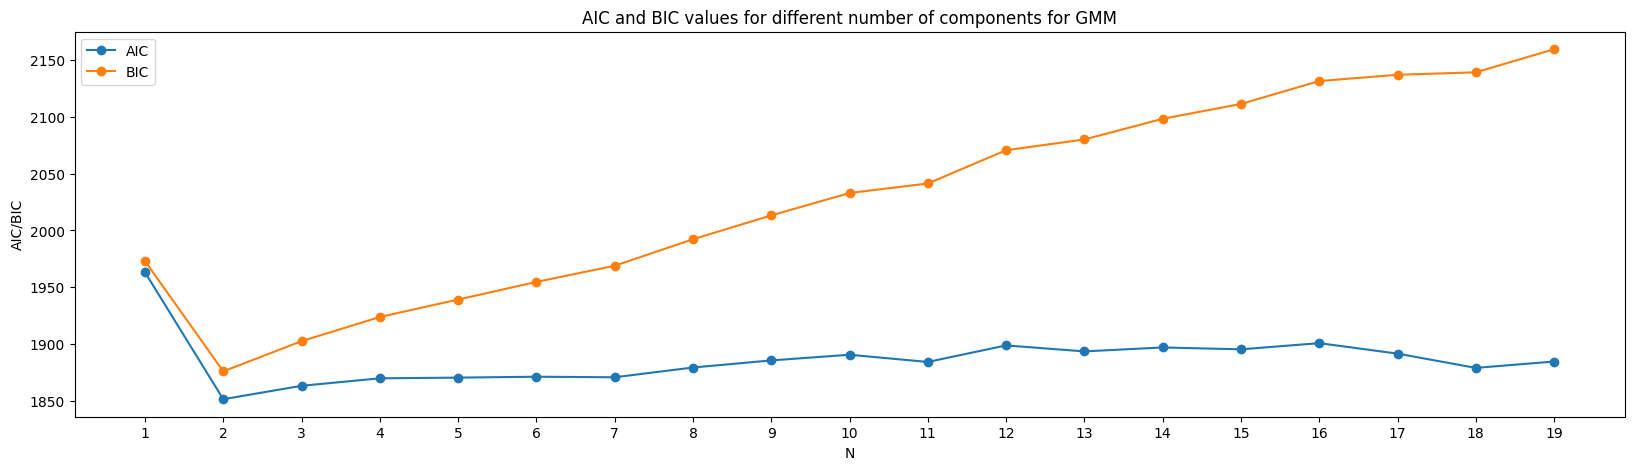

In [7]:
df = pd.read_csv('q3.txt', sep=' ', header=None, names=['x'])

# apply log_10 to the data
df['x'] = np.log10(df['x'])

# Fitting GMM Model with different number of components
from sklearn.mixture import GaussianMixture 
N = np.arange(1, 20)

def gmm_model(N, data):
    models = [None for i in range(len(N))]
    for i in range(len(N)):
        models[i] = GaussianMixture(N[i], covariance_type='full', max_iter=100)
        models[i].fit(data)
    return models

models = gmm_model(N, df['x'].values.reshape(-1, 1))
AIC = [m.aic(df['x'].values.reshape(-1, 1)) for m in models]
BIC = [m.bic(df['x'].values.reshape(-1, 1)) for m in models]

best_model = models[np.argmin(BIC)]
print('Best model has ', best_model.n_components, ' components')
print('Best model has AIC = ', best_model.aic(df['x'].values.reshape(-1, 1)), ' and BIC = ', best_model.bic(df['x'].values.reshape(-1, 1)))
print("Best fit Converged: ", best_model.converged_)

# Plotting the AIC and BIC values
plt.figure(figsize=(20, 5))
plt.plot(N, AIC, '-o', label='AIC')
plt.plot(N, BIC, '-o', label='BIC')
plt.xlabel('N')
plt.ylabel('AIC/BIC')
plt.xticks(N)
plt.legend()
plt.title('AIC and BIC values for different number of components for GMM')
plt.show()

# print(BIC)

As seen from the above plot the optimal number of components is 2.